#### Importing necessary packages

In [1]:
from bs4 import BeautifulSoup 
import requests
import numpy as np
import pandas as pd
from geopy.geocoders import Nominatim
from IPython.display import display_html
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize

#### Installing folium to get the necessary maps for visualization

In [2]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium
print('Folium is installed')

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python-3.8-main

  added / updated specs:
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.1.0               |             py_1         614 KB  conda-forge
    branca-0.4.2               |     pyhd8ed1ab_0          26 KB  conda-forge
    certifi-2021.5.30          |   py38h578d9bd_0         141 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    openssl-1.1.1k             |       h7f98852_0         2.1 MB  conda-forge
    python_abi-3.8             |           2_cp38           4 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    widgetsnbextension-3.5.1   |   py38h578d9bd_4         1.8 MB  conda-for

#### Getting the co-ordinates of Colombo 

In [3]:
address = 'Colombo, Sri Lanka'
geolocator = Nominatim(user_agent='Explorer_of_Colombo')
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

6.9387469 79.8541134


#### Obtaining the map of Colombo

In [4]:
colombo_map = folium.Map(location=[6.9387, 79.854], zoom_start=12)
colombo_map

#### Getting the wiki url for Areas in Colombo

In [5]:
wiki_url = 'https://en.wikipedia.org/wiki/Areas_of_Colombo'
table_class = 'nowraplinks mw-collapsible expanded navbox-inner mw-made-collapsible'
response = requests.get(wiki_url)
print(response.status_code)

200


#### Obtaining the dataframe

In [6]:
soup = BeautifulSoup(response.text, 'html.parser')
colombo_table = soup.find('table', {'class':'wikitable'})
colombo_table
df = pd.read_html(str(colombo_table))
df = pd.DataFrame(df[0])
df.head()


,Colombo,English Name,Native Name[2]
0,1,Colombo Fort,Kotuwa
1,2,Slave Island,Kompanyaweediya
2,3,Kolpity,Kollupitiya
3,4,Bambalapitiya,Bambalapitiya
4,5,"Narahenpita, Havelock Town , Kirulapona North","Narahenpita, Havelock Town , Kirulapona North"


#### Renaming the column to Area

In [7]:
df.rename(columns = {'English Name':'Area'}, inplace = True)
df.head()

,Colombo,Area,Native Name[2]
0,1,Colombo Fort,Kotuwa
1,2,Slave Island,Kompanyaweediya
2,3,Kolpity,Kollupitiya
3,4,Bambalapitiya,Bambalapitiya
4,5,"Narahenpita, Havelock Town , Kirulapona North","Narahenpita, Havelock Town , Kirulapona North"


#### Removing the column Native Name[2]

In [8]:
df.drop('Native Name[2]', inplace = True, axis = 1)
df.head()

,Colombo,Area
0,1,Colombo Fort
1,2,Slave Island
2,3,Kolpity
3,4,Bambalapitiya
4,5,"Narahenpita, Havelock Town , Kirulapona North"


#### Obtaining the latitude longitude dataframe 

In [9]:

# @hidden_cell
# The following code contains the credentials for a file in your IBM Cloud Object Storage.
# You might want to remove those credentials before you share your notebook.
credentials_1 = {
    'IAM_SERVICE_ID': 'iam-ServiceId-2225c5f0-a83b-4a52-a2e3-8c0c8a7c1408',
    'IBM_API_KEY_ID': '-E2bpRGNnKkhSwKXnXhBjnH5ibIIjxe76udvSOzJ6brr',
    'ENDPOINT': 'https://s3.private.us.cloud-object-storage.appdomain.cloud',
    'IBM_AUTH_ENDPOINT': 'https://iam.cloud.ibm.com/oidc/token',
    'BUCKET': 'capstoneproject-donotdelete-pr-b5gcplwihty1px',
    'FILE': 'Lat_Lng_Colombo.csv'
}


In [10]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_571d3a213a314c0ebd777b4e63bcdf2d = 'https://s3.us.cloud-object-storage.appdomain.cloud'
else:
    endpoint_571d3a213a314c0ebd777b4e63bcdf2d = 'https://s3.private.us.cloud-object-storage.appdomain.cloud'

client_571d3a213a314c0ebd777b4e63bcdf2d = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='-E2bpRGNnKkhSwKXnXhBjnH5ibIIjxe76udvSOzJ6brr',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_571d3a213a314c0ebd777b4e63bcdf2d)

body = client_571d3a213a314c0ebd777b4e63bcdf2d.get_object(Bucket='capstoneproject-donotdelete-pr-b5gcplwihty1px',Key='Lat_Lng_Colombo.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1


,Area,Latitude,Longitude
0,Thalawatugoda,6.8760,79.9350
1,Bambalapitiya,6.9020,79.8550
2,Slave Island,6.9240,79.8500
3,Havelock Town,6.8860,79.8650
4,Colombo Fort,6.9340,79.8530
5,Wellawatte,6.8740,79.8590
6,Nawala,6.8870,79.8870
7,Battaramulla,6.9020,79.9195
8,Dehiwala,6.8510,79.8660
9,Nugegoda,6.8700,79.8880


#### Showing the neighbourhoods of colombo as a cluster for easy visualization

In [11]:
for lat, lng in zip(df_data_1['Latitude'], df_data_1['Longitude']):
    folium.CircleMarker(
        [lat, lng],
        radius=7,
        color='green',
        fill = True,
        fill_color='blue',
        fill_opacity=0.8
    ).add_to(colombo_map)

In [12]:
colombo_map

#### Obtaining population dataframe of differnt neighbourhoods of Colombo

In [13]:

# @hidden_cell
# The following code contains the credentials for a file in your IBM Cloud Object Storage.
# You might want to remove those credentials before you share your notebook.
credentials_2 = {
    'IAM_SERVICE_ID': 'iam-ServiceId-2225c5f0-a83b-4a52-a2e3-8c0c8a7c1408',
    'IBM_API_KEY_ID': '-E2bpRGNnKkhSwKXnXhBjnH5ibIIjxe76udvSOzJ6brr',
    'ENDPOINT': 'https://s3.private.us.cloud-object-storage.appdomain.cloud',
    'IBM_AUTH_ENDPOINT': 'https://iam.cloud.ibm.com/oidc/token',
    'BUCKET': 'capstoneproject-donotdelete-pr-b5gcplwihty1px',
    'FILE': 'Population_Colombo.csv'
}


In [14]:

body = client_571d3a213a314c0ebd777b4e63bcdf2d.get_object(Bucket='capstoneproject-donotdelete-pr-b5gcplwihty1px',Key='Population_Colombo.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_2 = pd.read_csv(body)
df_data_2


,Neighbourhood,Number,Population
0,Fort,1,17029
1,Kochchikade,2,80045
2,Maradana,3,47997
3,Kollupitiya,4,47432
4,Mattakuliya,5,59027
5,Kotahena,6,34052
6,Grandpass,7,54018
7,Dematagoda,8,58854
8,Borella,9,27849
9,Cinamon Gardens,10,16738


#### Visualizing the population data using a bar chart

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

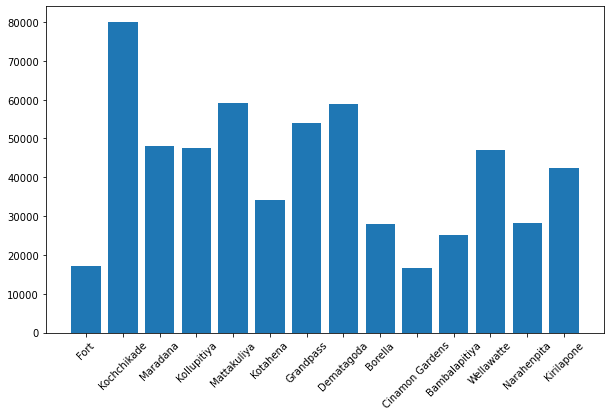

In [15]:
plt.figure(figsize=(10, 6))
plt.bar(x = df_data_2['Neighbourhood'], height = df_data_2['Population'])
plt.xticks(rotation=45)

#### Obtaing the data of Coffee Shops using the Foursquare API

In [7]:
CLIENT_ID = 'O3NMGEDHKKHXNFBVGNMLS4NQZLH51A1SS0JZMZHTHWGBU1AN' # your Foursquare ID
CLIENT_SECRET = 'MSNSNVKKHLO1UAPH3DQCERXDGGCBTOFKMDB4WXVO0X0FINGD' # your Foursquare Secret
ACCESS_TOKEN = 'BZJLSABVNBN20FQPUNZ1JSFZTUQJGRKYGZRJ4KUI1T0D1SUS' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: O3NMGEDHKKHXNFBVGNMLS4NQZLH51A1SS0JZMZHTHWGBU1AN
CLIENT_SECRET:MSNSNVKKHLO1UAPH3DQCERXDGGCBTOFKMDB4WXVO0X0FINGD


In [13]:
address = 'Union Place, Colombo'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)


6.9189669 79.8608973


In [14]:
search_query = 'Coffee'
radius = 10000
print(search_query + ' .... OK!')

Coffee .... OK!


In [15]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=O3NMGEDHKKHXNFBVGNMLS4NQZLH51A1SS0JZMZHTHWGBU1AN&client_secret=MSNSNVKKHLO1UAPH3DQCERXDGGCBTOFKMDB4WXVO0X0FINGD&ll=6.9189669,79.8608973&oauth_token=BZJLSABVNBN20FQPUNZ1JSFZTUQJGRKYGZRJ4KUI1T0D1SUS&v=20180604&query=Coffee&radius=10000&limit=30'

In [16]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '611bf56c8155671be3c828bc'},
 'notifications': [{'type': 'notificationTray', 'item': {'unreadCount': 0}}],
 'response': {'venues': [{'id': '4b991ccbf964a5201e6235e3',
    'name': 'The Coffee Bean & Tea Leaf',
    'location': {'address': 'No 2 Maitland Crescent, Colombo 07.',
     'crossStreet': 'Horton Pl.',
     'lat': 6.911451763532337,
     'lng': 79.86674748639983,
     'labeledLatLngs': [{'label': 'display',
       'lat': 6.911451763532337,
       'lng': 79.86674748639983}],
     'distance': 1057,
     'postalCode': '00700',
     'cc': 'LK',
     'city': 'කොළඹ',
     'state': 'Western Province',
     'country': 'ශ්\u200dරී ලංකාව',
     'formattedAddress': ['No 2 Maitland Crescent, Colombo 07. (Horton Pl.)',
      'කොළඹ 00700',
      'ශ්\u200dරී ලංකාව']},
    'categories': [{'id': '4bf58dd8d48988d1e0931735',
      'name': 'Coffee Shop',
      'pluralName': 'Coffee Shops',
      'shortName': 'Coffee Shop',
      'icon': {'prefix': 'https://ss3.4sq

In [17]:
venues = results['response']['venues']
coffee_shops = json_normalize(venues)
coffee_shops

<ipython-input-17-81452dab024f>:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  coffee_shops = json_normalize(venues)


,id,name,categories,referralId,hasPerk,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress
0,4b991ccbf964a5201e6235e3,The Coffee Bean & Tea Leaf,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",v-1629222252,False,"No 2 Maitland Crescent, Colombo 07.",Horton Pl.,6.911452,79.866747,"[{'label': 'display', 'lat': 6.911451763532337...",1057,00700,LK,කොළඹ,Western Province,ශ්‍රී ලංකාව,"[No 2 Maitland Crescent, Colombo 07. (Horton P..."
1,4c7192ccf4d476b035bd5acf,Coffee Stop - Cinnamon Grand,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",v-1629222252,False,"77, Galle Road",at Cinnamon Grand,6.917826,79.848547,"[{'label': 'display', 'lat': 6.917825860678314...",1370,00300,LK,Colombo,WP,ශ්‍රී ලංකාව,"[77, Galle Road (at Cinnamon Grand), Colombo 0..."
2,553915b3498eb10d08ee7371,The Coffee Bean & Tea Leaf,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",v-1629222252,False,Liberty Plaza,Kollupitiya,6.911989,79.851029,"[{'label': 'display', 'lat': 6.911989216583282...",1338,NaN,LK,කොළඹ,Western Province,ශ්‍රී ලංකාව,"[Liberty Plaza (Kollupitiya), කොළඹ, ශ්‍රී ලංකාව]"
3,511e20d1e4b01379c635b278,Coffee Lounge,"[{'id': '4bf58dd8d48988d16a941735', 'name': 'B...",v-1629222252,False,NaN,NaN,6.917490,79.860150,"[{'label': 'display', 'lat': 6.91749, 'lng': 7...",183,NaN,LK,NaN,NaN,ශ්‍රී ලංකාව,[ශ්‍රී ලංකාව]
4,55e5188a498e34b61c727637,The Coffee Bean & Tea Leaf,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",v-1629222252,False,"The Landmark Building, 385 Galle Rd",NaN,6.903622,79.852232,"[{'label': 'display', 'lat': 6.903622370084617...",1958,NaN,LK,Colombo 03,NaN,ශ්‍රී ලංකාව,"[The Landmark Building, 385 Galle Rd, Colombo ..."
5,51c6dd7d498edd330574e47f,Arpico Coffee Lounge,"[{'id': '4bf58dd8d48988d16a941735', 'name': 'B...",v-1629222252,False,NaN,NaN,6.917756,79.860147,"[{'label': 'display', 'lat': 6.917755505367171...",158,NaN,LK,NaN,NaN,ශ්‍රී ලංකාව,[ශ්‍රී ලංකාව]
6,50811a2e90e7b15c3637ee30,The Coffee Bean & Tea Leaf,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",v-1629222252,False,"East Tower, 3rd Floor, World Trade Center, Col...",Sri Lanka,6.932782,79.843878,"[{'label': 'display', 'lat': 6.932782, 'lng': ...",2429,00300,LK,කොළඹ,Western Province,ශ්‍රී ලංකාව,"[East Tower, 3rd Floor, World Trade Center, Co..."
7,5a706127e57ca608d97be6bc,Coffee Bean & Tea Leaf,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",v-1629222252,False,NaN,NaN,6.919660,79.857390,"[{'label': 'display', 'lat': 6.9196596, 'lng':...",395,00200,LK,කොළඹ,Western Province,ශ්‍රී ලංකාව,"[කොළඹ 00200, ශ්‍රී ලංකාව]"
8,5a698c7cd69ed00450adf47c,Brown Bean coffee At Dialog,"[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",v-1629222252,False,NaN,NaN,6.917628,79.863128,"[{'label': 'display', 'lat': 6.917628, 'lng': ...",288,NaN,LK,කොළඹ,Western Province,ශ්‍රී ලංකාව,"[කොළඹ, ශ්‍රී ලංකාව]"
9,5618b7ac498e5b3e11c801bb,excel coffee lounge,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",v-1629222252,False,NaN,NaN,6.922004,79.861204,"[{'label': 'display', 'lat': 6.922004, 'lng': ...",339,NaN,LK,NaN,NaN,ශ්‍රී ලංකාව,[ශ්‍රී ලංකාව]


#### Showing the places of Coffee Shops according to Foursquare API

In [18]:
Coffee_map = folium.Map(location = [latitude, longitude], zoom_start = 13)

folium.CircleMarker([latitude, longitude],
                   radius = 10,
                   color = 'red',
                   popup = 'Union Place',
                   fill = True,
                   fill_color = 'red',
                   fill_opacity = 0.6).add_to(Coffee_map)

for lat, lng in zip(coffee_shops['location.lat'], coffee_shops['location.lng']):
    folium.CircleMarker([lat, lng],
                       radius = 5,
                       color = 'blue',
                       fill = True,
                       fill_color = 'blue',
                       fill_opacity = 0.6).add_to(Coffee_map)

In [19]:
Coffee_map

#### Obtaining the dataframe with number of coffee shops in neighbourhood

In [24]:

# @hidden_cell
# The following code contains the credentials for a file in your IBM Cloud Object Storage.
# You might want to remove those credentials before you share your notebook.
credentials_3 = {
    'IAM_SERVICE_ID': 'iam-ServiceId-2225c5f0-a83b-4a52-a2e3-8c0c8a7c1408',
    'IBM_API_KEY_ID': '-E2bpRGNnKkhSwKXnXhBjnH5ibIIjxe76udvSOzJ6brr',
    'ENDPOINT': 'https://s3.private.us.cloud-object-storage.appdomain.cloud',
    'IBM_AUTH_ENDPOINT': 'https://iam.cloud.ibm.com/oidc/token',
    'BUCKET': 'capstoneproject-donotdelete-pr-b5gcplwihty1px',
    'FILE': 'Number of Coffee Shops.csv'
}


In [26]:

body = client_571d3a213a314c0ebd777b4e63bcdf2d.get_object(Bucket='capstoneproject-donotdelete-pr-b5gcplwihty1px',Key='Number of Coffee Shops.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_3 = pd.read_csv(body)
df_data_3


,Neighbourhood,Coffee Shops
0,Fort,3
1,Kollupitiya,8
2,Union Place,4
3,Panchikawatte,1
4,Cinamon Gardens,3
5,Rajagiriya,1
6,Bambalapitiya,2
7,Wellawatte,1
8,Dematagoda,1
9,Kolonnawa,1


#### Visualizing the number of coffe shops in each neighbourhood using a pie chart

In [32]:
exp_vals = [3, 8, 4, 1, 3, 1, 2, 1, 1, 1]
exp_labels = ['Fort', 'Kollupitiya', 'Union Place', 'Panchikawatte', 'Cinamon Gardens', 'Rajagiriya', 'Bambalapitiya', 'Wellawatte', 'Dematagoda', 'Kolonnawa']

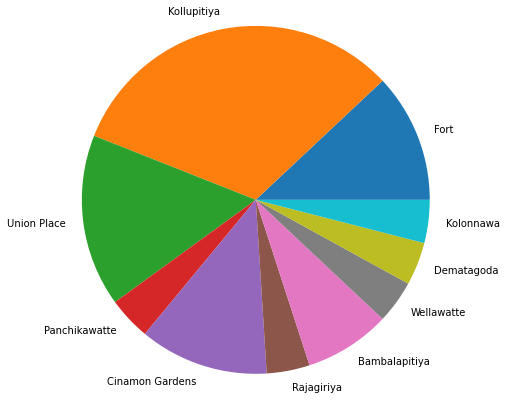

In [36]:
plt.pie(exp_vals, labels = exp_labels, radius = 2)
plt.show()

#### Getting the locations of coffee shops from different loacation to visualize

In [25]:
address = 'Parliament Road, Sri Lanka'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)


6.8920996 79.9220897


In [26]:
search_query = 'Coffee'
radius = 10000
print(search_query + ' .... OK!')
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, search_query, radius, LIMIT)
results = requests.get(url).json()
venues = results['response']['venues']
coffee_shops1 = json_normalize(venues)
coffee_shops1

Coffee .... OK!


<ipython-input-26-bd5716dd37e3>:7: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  coffee_shops1 = json_normalize(venues)


,id,name,categories,referralId,hasPerk,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress
0,4b991ccbf964a5201e6235e3,The Coffee Bean & Tea Leaf,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",v-1629222747,False,"No 2 Maitland Crescent, Colombo 07.",Horton Pl.,6.911452,79.866747,"[{'label': 'display', 'lat': 6.911451763532337...",6484,00700,LK,කොළඹ,Western Province,ශ්‍රී ලංකාව,"[No 2 Maitland Crescent, Colombo 07. (Horton P..."
1,4c7192ccf4d476b035bd5acf,Coffee Stop - Cinnamon Grand,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",v-1629222747,False,"77, Galle Road",at Cinnamon Grand,6.917826,79.848547,"[{'label': 'display', 'lat': 6.917825860678314...",8617,00300,LK,Colombo,WP,ශ්‍රී ලංකාව,"[77, Galle Road (at Cinnamon Grand), Colombo 0..."
2,50811a2e90e7b15c3637ee30,The Coffee Bean & Tea Leaf,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",v-1629222747,False,"East Tower, 3rd Floor, World Trade Center, Col...",Sri Lanka,6.932782,79.843878,"[{'label': 'display', 'lat': 6.932782, 'lng': ...",9757,00300,LK,කොළඹ,Western Province,ශ්‍රී ලංකාව,"[East Tower, 3rd Floor, World Trade Center, Co..."
3,55e5188a498e34b61c727637,The Coffee Bean & Tea Leaf,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",v-1629222747,False,"The Landmark Building, 385 Galle Rd",NaN,6.903622,79.852232,"[{'label': 'display', 'lat': 6.903622370084617...",7826,NaN,LK,Colombo 03,NaN,ශ්‍රී ලංකාව,"[The Landmark Building, 385 Galle Rd, Colombo ..."
4,50d9c631e4b0aceb2bcca579,Coffee Shop,"[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",v-1629222747,False,NaN,NaN,6.915989,79.907280,"[{'label': 'display', 'lat': 6.915988597508685...",3122,NaN,LK,NaN,NaN,ශ්‍රී ලංකාව,[ශ්‍රී ලංකාව]
5,553915b3498eb10d08ee7371,The Coffee Bean & Tea Leaf,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",v-1629222747,False,Liberty Plaza,Kollupitiya,6.911989,79.851029,"[{'label': 'display', 'lat': 6.911989216583282...",8159,NaN,LK,කොළඹ,Western Province,ශ්‍රී ලංකාව,"[Liberty Plaza (Kollupitiya), කොළඹ, ශ්‍රී ලංකාව]"
6,53a966ba498ec87c420442d5,coffee cafe,"[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",v-1629222747,False,NaN,NaN,6.870168,79.940707,"[{'label': 'display', 'lat': 6.870168, 'lng': ...",3192,NaN,LK,NaN,NaN,ශ්‍රී ලංකාව,[ශ්‍රී ලංකාව]
7,5b6eae5ee075500039fa5760,The Coffee Rooms,"[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",v-1629222747,False,NaN,NaN,6.903922,79.894210,"[{'label': 'display', 'lat': 6.9039216, 'lng':...",3350,NaN,LK,Sri Jayewardenepura Kotte,Western Province,ශ්‍රී ලංකාව,"[Sri Jayawardenepura Kotte, ශ්‍රී ලංකාව]"
8,519f660c498ef048d91ff647,Ice coffee dansala,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",v-1629222747,False,NaN,NaN,6.897927,79.906395,"[{'label': 'display', 'lat': 6.897926974887025...",1851,NaN,LK,NaN,NaN,ශ්‍රී ලංකාව,[ශ්‍රී ලංකාව]
9,59d4cefee1f0aa21ef39a0cc,The Coffee House,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",v-1629222747,False,Malabe,NaN,6.904835,79.952050,"[{'label': 'display', 'lat': 6.904835, 'lng': ...",3601,NaN,LK,Sri Jayewardenepura Kotte,Western Province,ශ්‍රී ලංකාව,"[Malabe, Sri Jayawardenepura Kotte, ශ්‍රී ලංකාව]"


In [28]:
Coffee_map1 = folium.Map(location = [latitude, longitude], zoom_start = 13)

folium.CircleMarker([latitude, longitude],
                   radius = 10,
                   color = 'red',
                   popup = 'Parliament Road',
                   fill = True,
                   fill_color = 'red',
                   fill_opacity = 0.6).add_to(Coffee_map1)

for lat, lng in zip(coffee_shops1['location.lat'], coffee_shops1['location.lng']):
    folium.CircleMarker([lat, lng],
                       radius = 5,
                       color = 'blue',
                       fill = True,
                       fill_color = 'blue',
                       fill_opacity = 0.6).add_to(Coffee_map1)
Coffee_map1